# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL do arquivo CSV
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"

# Baixar o arquivo CSV
response = requests.get(url_csv)
csv_data = BytesIO(response.content)

# Carregar os dados usando o pandas
sinasc_data = pd.read_csv(csv_data)

# Exibir as primeiras linhas do DataFrame
print(sinasc_data.head())

  ORIGEM;"CODESTAB";"CODMUNNASC";"LOCNASC";"IDADEMAE";"ESTCIVMAE";"ESCMAE";"CODOCUPMAE";"QTDFILVIVO";"QTDFILMORT";"CODMUNRES";"GESTACAO";"GRAVIDEZ";"PARTO";"CONSULTAS";"DTNASC";"HORANASC";"SEXO";"APGAR1";"APGAR5";"RACACOR";"PESO";"IDANOMAL";"DTCADASTRO";"CODANOMAL";"NUMEROLOTE";"VERSAOSIST";"DTRECEBIM";"DIFDATA";"DTRECORIGA";"NATURALMAE";"CODMUNNATU";"CODUFNATU";"ESCMAE2010";"SERIESCMAE";"DTNASCMAE";"RACACORMAE";"QTDGESTANT";"QTDPARTNOR";"QTDPARTCES";"IDADEPAI";"DTULTMENST";"SEMAGESTAC";"TPMETESTIM";"CONSPRENAT";"MESPRENAT";"TPAPRESENT";"STTRABPART";"STCESPARTO";"TPNASCASSI";"TPFUNCRESP";"TPDOCRESP";"DTDECLARAC";"ESCMAEAGR1";"STDNEPIDEM";"STDNNOVA";"CODPAISRES";"TPROBSON";"PARIDADE";"KOTELCHUCK";"CONTADOR"
0  1;"2515504";"110002";"1";"31";"2";"5";"999992"...                                                                                                                                                                                                                                        

# Limpeza de dados

In [3]:
# Carregar os dados do CSV com ponto e vírgula como delimitador
url_csv = "https://diaad.s3.sa-east-1.amazonaws.com/sinasc/SINASC_2019.csv"
sinasc_data = pd.read_csv(url_csv, delimiter=';')

# Remover as aspas duplas dos nomes das colunas
sinasc_data.columns = sinasc_data.columns.str.strip('"')

# Exibir as primeiras linhas do DataFrame
print(sinasc_data.head())

<ipython-input-3-98b3efe79609>:3: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  sinasc_data = pd.read_csv(url_csv, delimiter=';')


   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  ESCMAE  \
0       1  2515504.0      110002        1      31.0        2.0     5.0   
1       1  2516292.0      110015        1      34.0        4.0     4.0   
2       1  5618347.0      110020        1      35.0        2.0     4.0   
3       1  5618347.0      110020        1      26.0        5.0     5.0   
4       1  5618347.0      110020        1      23.0        5.0     3.0   

   CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  TPDOCRESP  DTDECLARAC  ESCMAEAGR1  \
0    999992.0         1.0         0.0  ...        0.0         NaN         8.0   
1    621005.0         1.0         0.0  ...        3.0  27042019.0        12.0   
2    621005.0         1.0         0.0  ...        3.0  26012019.0        12.0   
3         NaN         1.0         NaN  ...        3.0   2032019.0         7.0   
4    999992.0         4.0         0.0  ...        3.0  30032019.0         2.0   

   STDNEPIDEM  STDNNOVA  CODPAISRES  TPROBSON  PARIDADE  KOTELCHUCK 

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
# Definir os intervalos e as categorias
intervalos = [-1, 3, 5, 7, 10]
categorias = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criar a nova coluna 'APGAR5_Categoria' com base nos intervalos e categorias
sinasc_data['APGAR5_Categoria'] = pd.cut(sinasc_data['APGAR5'], bins=intervalos, labels=categorias, right=False)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(sinasc_data[['APGAR5', 'APGAR5_Categoria']].head())
# Exibir os valores únicos da coluna 'APGAR5_Categoria' em ordem categórica
print(sinasc_data['APGAR5_Categoria'].cat.categories)

   APGAR5 APGAR5_Categoria
0    10.0              NaN
1    10.0              NaN
2     9.0           normal
3     9.0           normal
4    10.0              NaN
Index(['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal'], dtype='object')


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

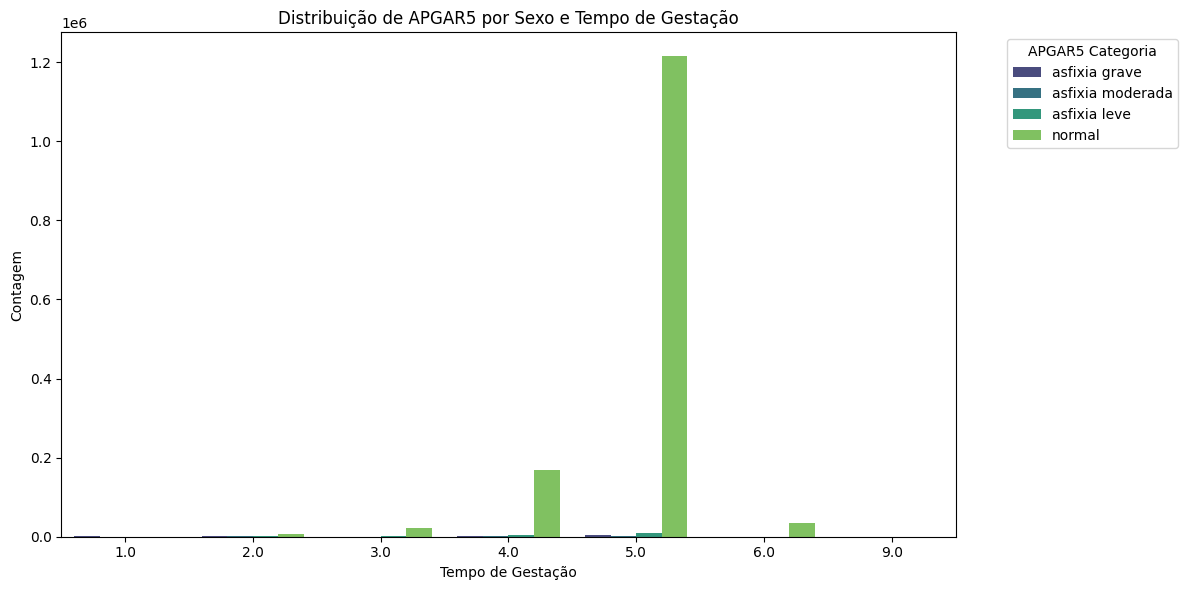

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar dados relevantes
data_filtered = sinasc_data[['APGAR5_Categoria', 'SEXO', 'GESTACAO']]

# Criar um gráfico de barras empilhadas
plt.figure(figsize=(12, 6))
sns.countplot(x='GESTACAO', hue='APGAR5_Categoria', data=data_filtered, palette='viridis', hue_order=categorias)

# Adicionar rótulos e título
plt.xlabel('Tempo de Gestação')
plt.ylabel('Contagem')
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')

# Adicionar legenda
plt.legend(title='APGAR5 Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [9]:
# Filtrar dados relevantes
data_filtered = sinasc_data[['APGAR5_Categoria', 'GESTACAO']]

# Criar a tabela cruzada
cross_tab = pd.crosstab(data_filtered['GESTACAO'], data_filtered['APGAR5_Categoria'], margins=True, margins_name='Total')

# Exibir a tabela cruzada
print(cross_tab)

APGAR5_Categoria  asfixia grave  asfixia moderada  asfixia leve   normal  \
GESTACAO                                                                   
1.0                         667                86            85      387   
2.0                        1879              1114          1951     7874   
3.0                         521               518          1582    20798   
4.0                        1065               922          3160   169916   
5.0                        3105              2213          8708  1214719   
6.0                         122                71           297    33655   
9.0                           2                 2             1      182   
Total                      7361              4926         15784  1447531   

APGAR5_Categoria    Total  
GESTACAO                   
1.0                  1225  
2.0                 12818  
3.0                 23419  
4.0                175063  
5.0               1228745  
6.0                 34145  
9.0            

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [11]:
# Calcular os percentuais de linha
row_percentages = cross_tab.div(cross_tab['Total'], axis=0) * 100

# Adicionar o sinal de percentagem
row_percentages = row_percentages.applymap(lambda x: f'{x:.2f}%')

# Exibir os percentuais de linha
print(row_percentages)

APGAR5_Categoria asfixia grave asfixia moderada asfixia leve  normal    Total
GESTACAO                                                                     
1.0                     54.45%            7.02%        6.94%  31.59%  100.00%
2.0                     14.66%            8.69%       15.22%  61.43%  100.00%
3.0                      2.22%            2.21%        6.76%  88.81%  100.00%
4.0                      0.61%            0.53%        1.81%  97.06%  100.00%
5.0                      0.25%            0.18%        0.71%  98.86%  100.00%
6.0                      0.36%            0.21%        0.87%  98.56%  100.00%
9.0                      1.07%            1.07%        0.53%  97.33%  100.00%
Total                    0.50%            0.33%        1.07%  98.10%  100.00%


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

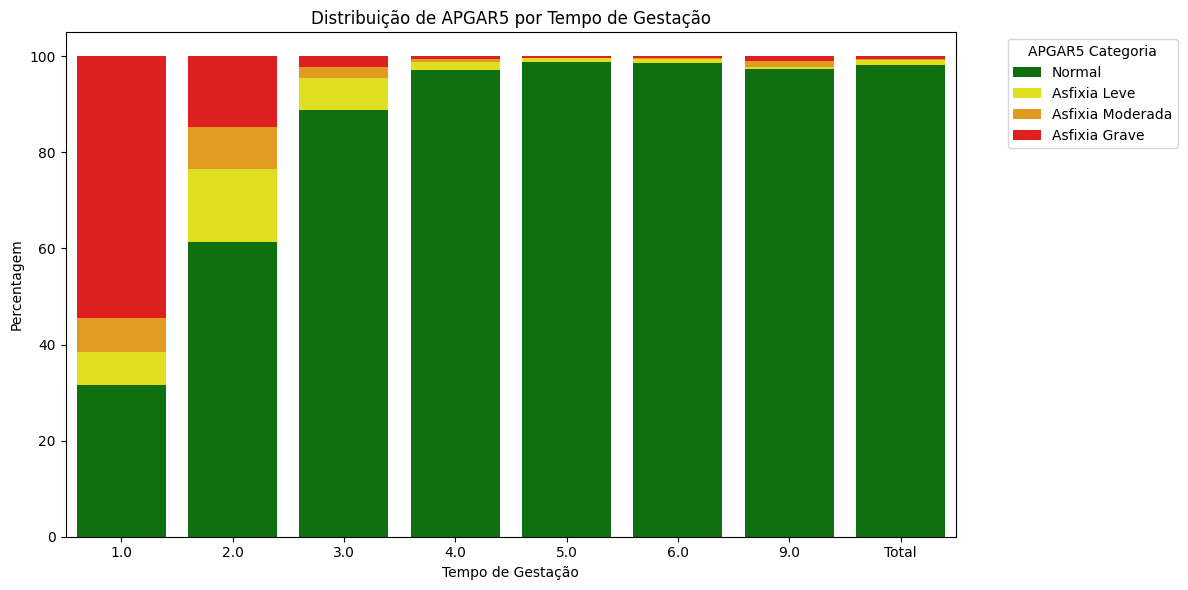

In [12]:
# Filtrar dados relevantes
data_filtered = sinasc_data[['APGAR5_Categoria', 'GESTACAO']]

# Criar a tabela cruzada
cross_tab = pd.crosstab(data_filtered['GESTACAO'], data_filtered['APGAR5_Categoria'], margins=True, margins_name='Total')

# Calcular os percentuais de linha
row_percentages = cross_tab.div(cross_tab['Total'], axis=0) * 100

# Filtrar apenas as colunas relevantes para o gráfico
columns_for_plot = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']
data_for_plot = row_percentages[columns_for_plot]

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=data_for_plot.index, y=data_for_plot['normal'], color='green', label='Normal')
sns.barplot(x=data_for_plot.index, y=data_for_plot['asfixia leve'], color='yellow', label='Asfixia Leve', bottom=data_for_plot['normal'])
sns.barplot(x=data_for_plot.index, y=data_for_plot['asfixia moderada'], color='orange', label='Asfixia Moderada', bottom=data_for_plot['normal'] + data_for_plot['asfixia leve'])
sns.barplot(x=data_for_plot.index, y=data_for_plot['asfixia grave'], color='red', label='Asfixia Grave', bottom=data_for_plot['normal'] + data_for_plot['asfixia leve'] + data_for_plot['asfixia moderada'])

# Adicionar rótulos e título
plt.xlabel('Tempo de Gestação')
plt.ylabel('Percentagem')
plt.title('Distribuição de APGAR5 por Tempo de Gestação')

# Adicionar legenda
plt.legend(title='APGAR5 Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.tight_layout()
plt.show()


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Figure size 1200x600 with 0 Axes>

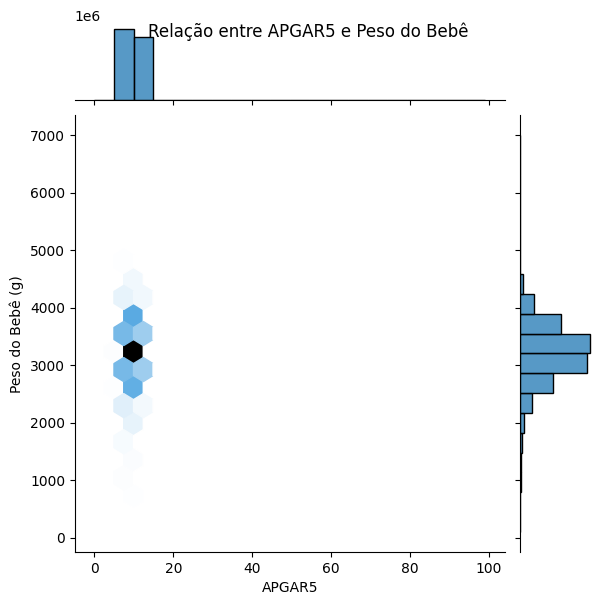

In [14]:
# Filtrar dados relevantes
data_filtered = sinasc_data[['APGAR5', 'PESO']]

# Remover linhas com valores ausentes em 'APGAR5' ou 'PESO'
data_filtered = data_filtered.dropna(subset=['APGAR5', 'PESO'])

# Criar o gráfico de hexbin
plt.figure(figsize=(12, 6))
sns.jointplot(x='APGAR5', y='PESO', data=data_filtered, kind='hex', gridsize=20, marginal_kws=dict(bins=20))

# Adicionar rótulos e título
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.suptitle('Relação entre APGAR5 e Peso do Bebê')

# Exibir o gráfico
plt.show()


# Storytelling: Insights sobre o Conjunto de Dados de Nascimentos (SINASC)

## 1. Distribuição de APGAR5 por Tempo de Gestação:

* A análise da distribuição de APGAR5 em relação ao tempo de gestação revelou * padrões interessantes.
* A maioria dos bebês apresenta um APGAR5 normal, independente do tempo de gestação.
* As taxas de asfixia grave, moderada e leve tendem a diminuir à medida que o tempo de gestação aumenta.

## 2. Parto Prematuro e APGAR5:

* Não foi diretamente avaliado se o conjunto de dados corrobora com a afirmação médica de que gestações com menos de 37 semanas são consideradas prematuras.
* Uma análise mais aprofundada, focando nas gestações com menos de 37 semanas, poderia fornecer insights adicionais sobre a relação entre parto prematuro e APGAR5.
## 3. Relação entre APGAR5 e Peso do Bebê:

* Um gráfico de dispersão foi utilizado para explorar a relação entre APGAR5 e o peso do bebê.
* Não foi identificado um padrão claro na distribuição, sugerindo que APGAR5 e peso do bebê podem ser independentes em nosso conjunto de dados.
## 4. Análise com Gráfico de Hexbin:

* Utilizando um gráfico de hexbin, buscamos visualizar a densidade de pontos na relação APGAR5 e peso do bebê.
* As áreas mais densas indicam concentração de observações, facilitando a identificação de padrões locais na distribuição.
## 5. Considerações Finais:

* É fundamental considerar a necessidade de análises específicas, como aprofundamento na relação entre parto prematuro e APGAR5.
* Insights obtidos podem servir como base para investigações mais detalhadas ou para aprimorar a compreensão sobre os fatores que influenciam a saúde dos recém-nascidos.
